Trains a simple deep NN on the MNIST dataset.

Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.


In [12]:
from __future__ import print_function
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [4]:
batch_size = 128
num_classes = 10
epochs = 20



In [37]:

mnist=tf.keras.datasets.mnist
# m=mnist.load_data()
# print(m[0][0].shape,m[0][1].shape,m[1][0].shape,m[1][1].shape)

# cf) tensorflow_datasets 패키지 :  https://datascienceschool.net/view-notebook/cd2216fe352c4346bc1e5bb5efa9927e/


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


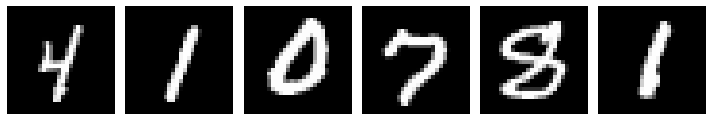

In [39]:
# # the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# # convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train


# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

60000 train samples
10000 test samples


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [40]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Epoch 1/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2484 - accuracy: 0.9240 - val_loss: 0.1480 - val_accuracy: 0.9556
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1018 - accuracy: 0.9694 - val_loss: 0.0812 - val_accuracy: 0.9756
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0732 - accuracy: 0.9778 - val_loss: 0.0846 - val_accuracy: 0.9770
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0587 - accuracy: 0.9825 - val_loss: 0.0746 - val_accuracy: 0.9806
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0512 - accuracy: 0.9848 - val_loss: 0.0780 - val_accuracy: 0.9788
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0733 - val_accuracy: 0.9824
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0877 - val_accuracy: 0.9800

In [42]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12606322765350342
Test accuracy: 0.982200026512146
